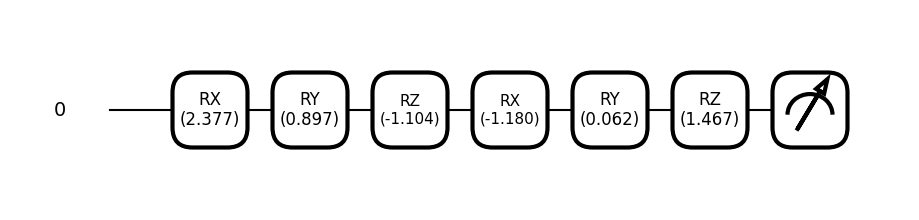

In [1]:
from tools import *
n_qubits = 1
circuit, params = vqa_gen_state(n_qubits)
target_vector, target_op = init_state_gen_state(np.pi/2,0)
best_params, f = train(10, circuit, params, target_op)
fig, ax = qml.draw_mpl(circuit, decimals=3)(params, target_op)
plt.show()

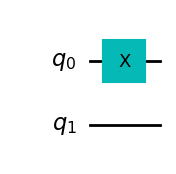

 > Observable: ['IZ']
 > Expectation value: -1.0
 > Metadata: {}


In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel='ibm_quantum', 
                                  #channel='ibm_cloud', 
                                  token='7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de',
                                  overwrite=True)
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main'
    #instance='ibm-q-research-2/federal-uni-sant-1/main'
)
backend = service.get_backend("ibmq_qasm_simulator")

from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit import QuantumCircuit

#circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
circuit = QuantumCircuit(2)
circuit.x(0)
circuit.draw(output='mpl')
observable = SparsePauliOp("IZ") # ordem ...210

#options = {"backend_name": "ibmq_qasm_simulator"}
estimator = Estimator()#options=options)
job = estimator.run(circuit, observable)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Observable: {observable.paulis}")
print(f" > Expectation value: {result.values[0]}")
print(f" > Metadata: {result.metadata[0]}")

In [9]:
program_inputs = {'iterations': 1}
options = {"backend_name": "ibmq_qasm_simulator"}
job = service.run(program_id="hello-world",
                  options=options,
                  inputs=program_inputs
                 )
#print(f"job id: {job.job_id()}")
result = job.result()
print(result)

/tmp/ipykernel_49939/3078647834.py:3: DeprecationWarning: Note that the 'job_id' and 'backend' attributes of a runtime job have been deprecated as of qiskit-ibm-runtime 0.7 and will be removed no sooner than 3 months after the release date. Please use the job_id() and backend() methods instead.
  job = service.run(program_id="hello-world",


Hello, World!


In [10]:
from tools import vqa_bpf
import cmath
import numpy as np
import torch

def general_state(theta, phi):
    state = np.zeros(2,dtype=complex)
    state[0] = np.cos(theta/2)
    state[1] = cmath.exp(1j*phi)*np.sin(theta/2)
    return state
print(general_state(np.pi/2,0))

def init_state_gen_state(n_qb, p):
    d = 2**n_qb
    target_vector = general_state(np.pi/2, 0)
    target_op = np.outer(target_vector.conj(), target_vector)
    target_op = torch.tensor(target_op)
    return target_vector, target_op

[0.70710678+0.j 0.70710678+0.j]


In [11]:
backend = service.get_backend("ibmq_qasm_simulator")


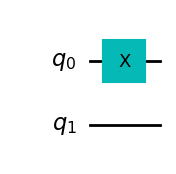

 > Observable: ['IZ']
 > Expectation value: -1.0
 > Metadata: {}


In [2]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit import QuantumCircuit

#circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
circuit = QuantumCircuit(2)
circuit.x(0)
circuit.draw(output='mpl')
observable = SparsePauliOp("IZ") # ordem ...210

#options = {"backend_name": "ibmq_qasm_simulator"}
estimator = Estimator()#options=options)
job = estimator.run(circuit, observable)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Observable: {observable.paulis}")
print(f" > Expectation value: {result.values[0]}")
print(f" > Metadata: {result.metadata[0]}")

# Iniciando o vqa_gen

In [18]:
import qiskit
from qiskit import *
nshots = 8192
IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de')
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor

configrc.store_credentials:WARNING:2023-02-22 15:06:57,836: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-02-22 15:06:58,086: Credentials are already in use. The existing account in the session will be replaced.


AttributeError: module 'qiskit_aer' has no attribute 'Aer'

In [19]:
!pip install qiskit-aer


In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

sv=Statevector(general_state(np.pi/2,0))
plot_state_qsphere(sv)

NameError: name 'general_state' is not defined

In [1]:
from tools import *
def vqa_gen_state(n_qubits, depht=None):
    #n_qubits = 1
    if depht == None:
        depht = n_qubits+1
    n = 3*n_qubits*(1+depht)
    params = random_params(n)
    device = qml.device('qiskit.aer', wires=n_qubits, backend='qasm_simulator')
    @qml.qnode(device, interface="torch")
    def circuit(params, M=None):
        w = [0,1]

        for j in range(0,24,6):
            #print(j)
            qml.RX(params[j], wires=0)
            qml.RY(params[j+1], wires=0)
            qml.RZ(params[j+2], wires=0)
            qml.RX(params[j+3], wires=1)
            qml.RY(params[j+4], wires=1)
            qml.RZ(params[j+5], wires=1)
            if j <18:
                qml.CNOT(wires=[0, 1])
        return qml.expval(qml.Hermitian(M, wires=w))
    return circuit, params
n_qubits = 2
circuit, params = vqa_gen_state(n_qubits)
target_vector, target_op = init_state_gen_state(np.pi/2,0)
#best_params, f = train(10, circuit, params, target_op)


ModuleNotFoundError: No module named 'torch'

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_quantum", token='7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de')


AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

In [12]:

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.get_backend("ibmq_manila")

In [3]:
#   HELLO WORLD

service = QiskitRuntimeService()
program_inputs = {'iterations': 1}
options = {"backend_name": "ibmq_qasm_simulator"}
job = service.run(program_id="hello-world",
                options=options,
                inputs=program_inputs
                )
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

/tmp/ipykernel_9411/2531918938.py:6: DeprecationWarning: Note that the 'job_id' and 'backend' attributes of a runtime job have been deprecated as of qiskit-ibm-runtime 0.7 and will be removed no sooner than 3 months after the release date. Please use the job_id() and backend() methods instead.
  job = service.run(program_id="hello-world",


job id: cfqtvlblcn34i20gvf20
Hello, World!


In [9]:
token = '7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de'


In [14]:
from pennylane_qiskit import upload_vqe_runner, vqe_runner
import pennylane as qml
from qiskit import IBMQ
#IBMQ.enable_account(token)

program_id = upload_vqe_runner(hub="ibm-q", group="open", project="main")

def vqe_circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
shots = 10

coeffs = [1, 1]
obs = [qml.PauliX(0), qml.PauliZ(0)]
hamiltonian = qml.Hamiltonian(coeffs, obs)

job = vqe_runner(
    program_id=program_id,
    backend="ibmq_manila",
    hamiltonian=hamiltonian,
    ansatz=vqe_circuit,
    x0=[3.97507603, 3.00854038],
    shots=shots,
    optimizer="SPSA",
    optimizer_config={"maxiter": 40},
    kwargs={"hub": "ibm-q", "group": "open", "project": "main"},
)

RequestsApiError: '403 Client Error: Forbidden for url: https://runtime-us-east.quantum-computing.ibm.com/jobs. {"errors":[{"code":"forbidden","message":"user not authorized to run program vqe-runtime-k6rzm0oRb6","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"cfr70ndprpjmbg75sr7g"}'

In [5]:
print(job.status())

AttributeError: 'RuntimeJobWrapper' object has no attribute 'status'

In [6]:
result = job.result()
print(result)

KeyboardInterrupt: 